<a href="https://colab.research.google.com/github/crox5/alura-store-challenge/blob/main/alura_store_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ Análisis de desempeño - Alura Store

**Objetivo:** Analizar el rendimiento de 4 tiendas de Alura Store para decidir cuál debe vender el Sr. Juan, usando Python y herramientas de análisis de datos.

## 🔹 1. Introducción
Breve descripción del proyecto y criterios a analizar.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)






Mounted at /content/drive


In [13]:
!ls /content/drive/MyDrive/


 020255158_26072015.ZIP
'100 ANUNCIOS DE FACEBOOK ADS _ 25 ADS QUE HICIERON HISTORIA _ 5 Videos Ecommerce que La Rompieron.pptx'
'100 ANUNCIOS DE FACEBOOK ADS.gdoc'
 1.-Hels-Justicia-Últimos-3-meses-Templado-Frío-Dinámico-Mayor-Volumen-jun-2-2021-al-jul-2-2024.csv
 1.Informe-justicia-jun-1-2021-al-jul-1-2024.csv
 20210201_164254.jpg
'2024-06-18 19-01-52.mp4'
'2.- LIMPIEZA DE DATOS CON SQL.gdoc'
'3.- LIMPIEZA DE DATOS CON PANDAS.gdoc'
 5DaysClub
 6635579355c4e6c5e7731d95.mp4
'666618006785286-Anuncios-2-jun-2021-2-jul-2024 (1).gsheet'
'666618006785286-Anuncios-2-jun-2021-2-jul-2024 (2).gsheet'
'666618006785286-Anuncios-2-jun-2021-2-jul-2024 (3).gsheet'
 666618006785286-Anuncios-2-jun-2021-2-jul-2024.csv
 666618006785286-Anuncios-2-jun-2021-2-jul-2024.gsheet
 ABOGACIA.gdoc
 Activadores_GTM_-_Eventos_AddToCart.gsheet
'Activity Dataset: Exploring (1).gsheet'
'Activity Dataset: Exploring.gsheet'
'Activity Dataset: Weeks 3-4.gsheet'
'add to cart 120.gdoc'
'ads 2.gsheet'
'ads 3.gsheet'
'ads

In [14]:
!ls /content/drive/MyDrive/AluraStoreData


'tienda_1 .csv'   tienda_2.csv	 tienda_3.csv   tienda_4.csv


In [16]:
import pandas as pd

ruta_base = "/content/drive/MyDrive/AluraStoreData/"

tienda_1 = pd.read_csv(ruta_base + "tienda_1 .csv")  # con espacio antes del punto
tienda_2 = pd.read_csv(ruta_base + "tienda_2.csv")
tienda_3 = pd.read_csv(ruta_base + "tienda_3.csv")
tienda_4 = pd.read_csv(ruta_base + "tienda_4.csv")

tienda_1.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## 🔹 2. Carga de datos

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Agregamos una columna para identificar de qué tienda proviene cada fila
tienda_1["tienda"] = "Tienda 1"
tienda_2["tienda"] = "Tienda 2"
tienda_3["tienda"] = "Tienda 3"
tienda_4["tienda"] = "Tienda 4"

# Unimos los 4 dataframes en uno solo
datos = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

# Mostramos las primeras filas
datos.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


## 🔹 3. Exploración inicial

In [ ]:
# datos.head()
# datos.info()
# datos.describe()

In [19]:
# Exploración inicial
print("Primeras filas:")
display(datos.head())

print("Resumen de estructura:")
datos.info()

print("Resumen estadístico:")
datos.describe()


Primeras filas:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


Resumen de estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB
Resumen est

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


## 🔹 4. Limpieza de datos (si es necesaria)

In [ ]:
# Verificar nulos, tipos de datos, duplicados, etc.

In [20]:
print("¿Hay valores nulos?")
display(datos.isnull().sum())

print("\n¿Hay filas duplicadas?")
print(datos.duplicated().sum())

print("\nTipos de datos por columna:")
display(datos.dtypes)

print("\nValores únicos por columna:")
for columna in datos.columns:
    print(f"{columna}: {datos[columna].nunique()} valores únicos")


¿Hay valores nulos?


,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0



¿Hay filas duplicadas?
0

Tipos de datos por columna:


,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64



Valores únicos por columna:
Producto: 51 valores únicos
Categoría del Producto: 8 valores únicos
Precio: 5483 valores únicos
Costo de envío: 1204 valores únicos
Fecha de Compra: 1185 valores únicos
Vendedor: 14 valores únicos
Lugar de Compra: 19 valores únicos
Calificación: 5 valores únicos
Método de pago: 4 valores únicos
Cantidad de cuotas: 19 valores únicos
lat: 19 valores únicos
lon: 19 valores únicos
tienda: 4 valores únicos


In [21]:
datos.dtypes


,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


In [22]:
datos.columns


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')

In [23]:
# 🔹 4. Limpieza de datos

# 1. Verificar valores nulos
print("🔍 Valores nulos por columna:")
print(datos.isnull().sum())

# 2. Verificar duplicados
duplicados = datos.duplicated().sum()
print(f"\n📌 Filas duplicadas: {duplicados}")
if duplicados > 0:
    datos = datos.drop_duplicates()
    print("✔️ Duplicados eliminados.")

# 3. Limpiar espacios en nombres de columnas
datos.columns = datos.columns.str.strip()

# 4. Mostrar tipos de datos
print("\n🔢 Tipos de datos por columna:")
print(datos.dtypes)

# 5. Confirmar limpieza final
print("\n✅ Limpieza de datos completada.")


🔍 Valores nulos por columna:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
tienda                    0
dtype: int64

📌 Filas duplicadas: 0

🔢 Tipos de datos por columna:
Producto                   object
Categoría del Producto     object
Precio                    float64
Costo de envío            float64
Fecha de Compra            object
Vendedor                   object
Lugar de Compra            object
Calificación                int64
Método de pago             object
Cantidad de cuotas          int64
lat                       float64
lon                       float64
tienda                     object
dtype: object

✅ Limpieza de datos completada.


## 🔹 5. Análisis por criterios

### 5.1 Facturación total por tienda

In [27]:
datos.columns.tolist()


['Producto',
 'Categoría del Producto',
 'Precio',
 'Costo de envío',
 'Fecha de Compra',
 'Vendedor',
 'Lugar de Compra',
 'Calificación',
 'Método de pago',
 'Cantidad de cuotas',
 'lat',
 'lon',
 'tienda']

In [28]:
datos.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [29]:
datos["facturacion"] = datos["Precio"]


💰 Facturación total por tienda:


,tienda,facturacion
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


<ipython-input-30-eb43fd5fbd32>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion_total, x="tienda", y="facturacion", palette="Blues_d")
<ipython-input-30-eb43fd5fbd32>:26: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


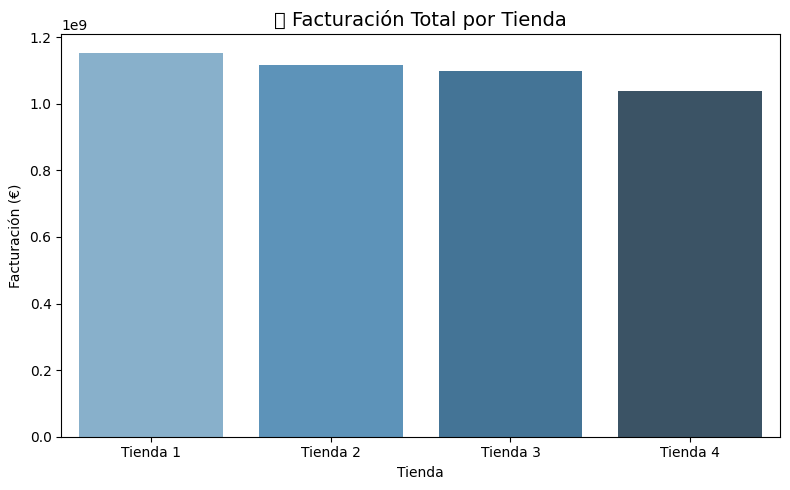

In [30]:
# Tu código aquí
# 🔹 5.1 Facturación total por tienda (ajustado)

# Asumimos que cada fila representa una unidad vendida
datos["facturacion"] = datos["Precio"]

# Agrupamos por tienda y sumamos la facturación
facturacion_total = datos.groupby("tienda")["facturacion"].sum().reset_index()

# Ordenamos de mayor a menor
facturacion_total = facturacion_total.sort_values(by="facturacion", ascending=False)

# Mostramos tabla
print("💰 Facturación total por tienda:")
display(facturacion_total)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=facturacion_total, x="tienda", y="facturacion", palette="Blues_d")
plt.title("💸 Facturación Total por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Facturación (€)")
plt.tight_layout()
plt.show()



### 5.2 Categorías más populares

📦 Categorías más populares:


,Categoría,Ventas
0,Muebles,1886
1,Electrónicos,1772
2,Juguetes,1290
3,Electrodomésticos,1149
4,Deportes y diversión,1113
5,Instrumentos musicales,753
6,Libros,742
7,Artículos para el hogar,730


<ipython-input-31-ebdbbc1c350e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categorias_populares, x="Ventas", y="Categoría", palette="viridis")
<ipython-input-31-ebdbbc1c350e>:18: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


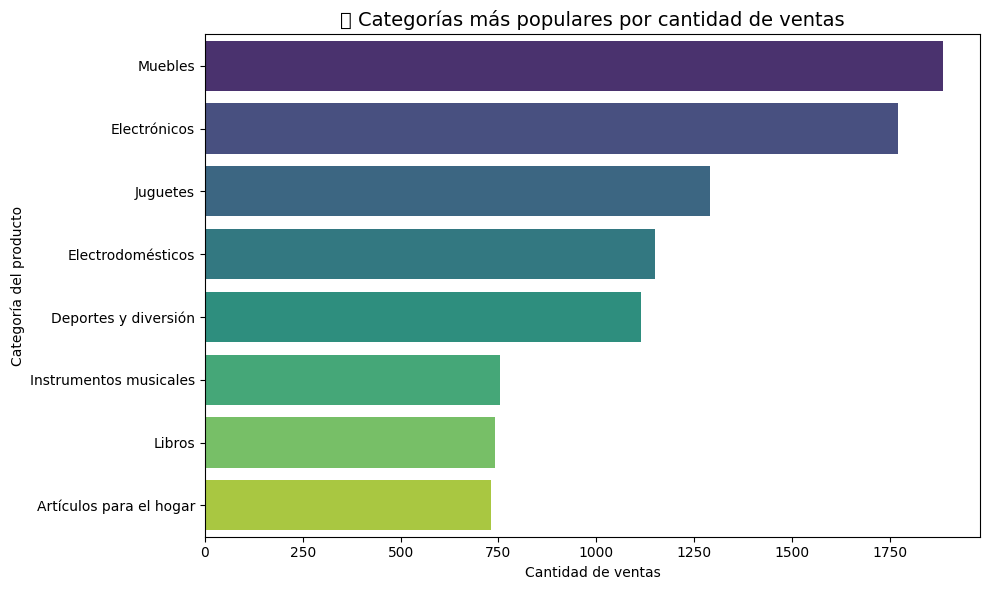

In [31]:
# Tu código aquí
# 🔹 5.2 Categorías más populares

# Contar cuántas veces aparece cada categoría
categorias_populares = datos["Categoría del Producto"].value_counts().reset_index()
categorias_populares.columns = ["Categoría", "Ventas"]

# Mostrar tabla
print("📦 Categorías más populares:")
display(categorias_populares)

# Visualizar
plt.figure(figsize=(10,6))
sns.barplot(data=categorias_populares, x="Ventas", y="Categoría", palette="viridis")
plt.title("🔥 Categorías más populares por cantidad de ventas", fontsize=14)
plt.xlabel("Cantidad de ventas")
plt.ylabel("Categoría del producto")
plt.tight_layout()
plt.show()


### 5.3 Promedio de calificación de clientes

⭐ Promedio de calificación por tienda:


,tienda,Calificación
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


<ipython-input-32-5d079ef4eebf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_calificaciones, x="tienda", y="Calificación", palette="crest")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


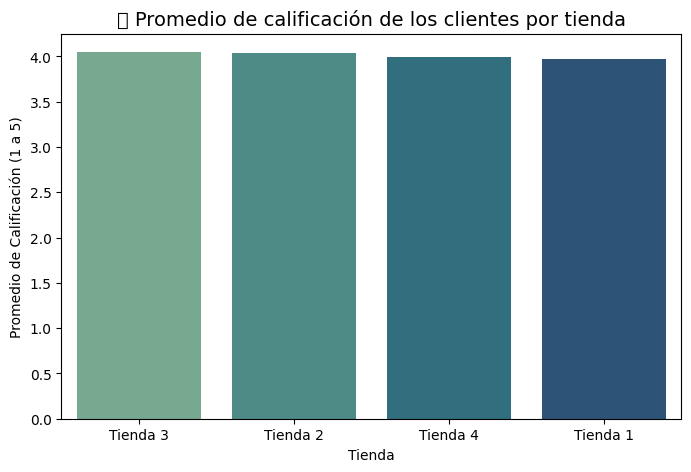

In [32]:
# Tu código aquí
# 🔹 5.3 Promedio de calificación de clientes

# Agrupamos por tienda y calculamos el promedio
promedio_calificaciones = datos.groupby("tienda")["Calificación"].mean().reset_index()

# Ordenamos de mayor a menor
promedio_calificaciones = promedio_calificaciones.sort_values(by="Calificación", ascending=False)

# Mostramos la tabla
print("⭐ Promedio de calificación por tienda:")
display(promedio_calificaciones)

# Visualización
plt.figure(figsize=(8,5))
sns.barplot(data=promedio_calificaciones, x="tienda", y="Calificación", palette="crest")
plt.title("⭐ Promedio de calificación de los clientes por tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Promedio de Calificación (1 a 5)")
plt


### 5.4 Productos más y menos vendidos

📈 Top 10 productos más vendidos:


,Producto,Ventas
0,Mesa de noche,210
1,Carrito de control remoto,206
2,Microondas,206
3,Batería,203
4,Cama king,201
5,Secadora de ropa,200
6,Modelado predictivo,200
7,Set de ollas,200
8,Cama box,199
9,Bloques de construcción,199


<ipython-input-33-07335ee95813>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=productos_mas_vendidos.head(10), x="Ventas", y="Producto", palette="crest")
<ipython-input-33-07335ee95813>:17: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


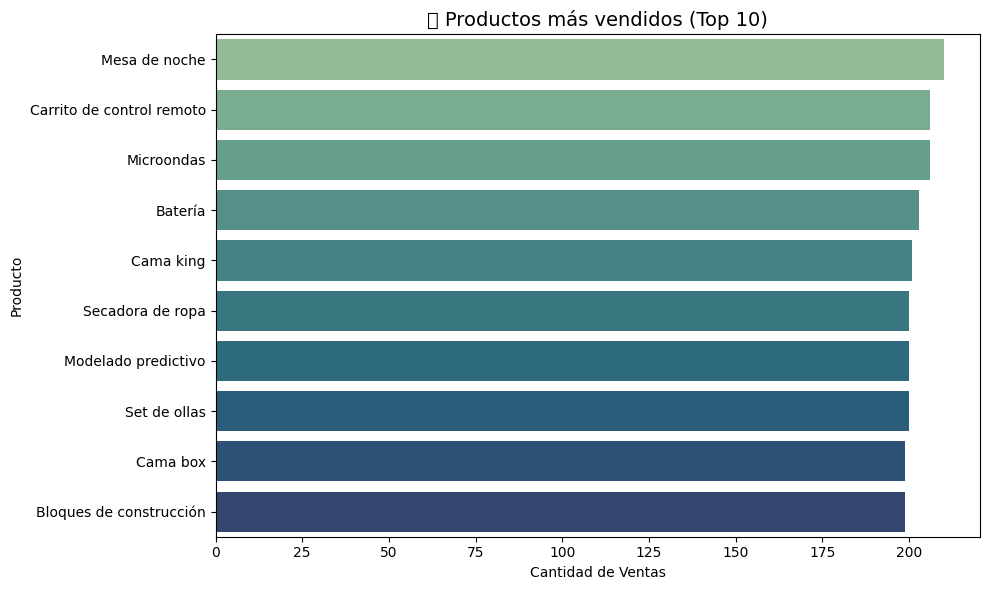

In [33]:
# Tu código aquí
# 🔹 5.4 Productos más vendidos

productos_mas_vendidos = datos["Producto"].value_counts().reset_index()
productos_mas_vendidos.columns = ["Producto", "Ventas"]

# Mostramos el top 10
print("📈 Top 10 productos más vendidos:")
display(productos_mas_vendidos.head(10))

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(data=productos_mas_vendidos.head(10), x="Ventas", y="Producto", palette="crest")
plt.title("📦 Productos más vendidos (Top 10)", fontsize=14)
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


### 5.5 Costo promedio de envío

📉 Top 10 productos menos vendidos:


,Producto,Ventas
50,Celular ABXY,157
49,Auriculares con micrófono,158
48,Mochila,163
47,Guitarra eléctrica,165
46,Ciencia de datos con Python,166
45,Asistente virtual,167
44,Sillón,168
43,Set de vasos,169
41,Olla de presión,172
42,Smartwatch,172


<ipython-input-34-41f1b02976b9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=productos_menos_vendidos, x="Ventas", y="Producto", palette="flare")
<ipython-input-34-41f1b02976b9>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


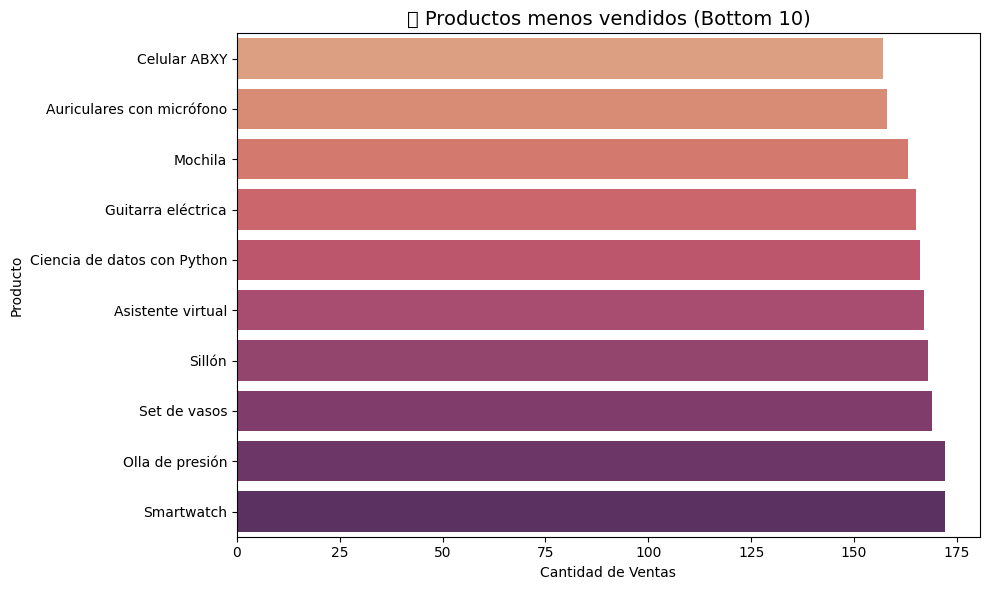

In [34]:
# Tu código aquí
# 🔹 Productos menos vendidos (Bottom 10)

productos_menos_vendidos = datos["Producto"].value_counts().reset_index()
productos_menos_vendidos.columns = ["Producto", "Ventas"]
productos_menos_vendidos = productos_menos_vendidos.sort_values(by="Ventas").head(10)

# Mostrar tabla
print("📉 Top 10 productos menos vendidos:")
display(productos_menos_vendidos)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(data=productos_menos_vendidos, x="Ventas", y="Producto", palette="flare")
plt.title("📉 Productos menos vendidos (Bottom 10)", fontsize=14)
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


🚚 Costo promedio de envío por tienda:


,tienda,Costo de envío
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


<ipython-input-36-cdbcb8706a99>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=costo_envio_promedio, x="tienda", y="Costo de envío", palette="magma")
<ipython-input-36-cdbcb8706a99>:16: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


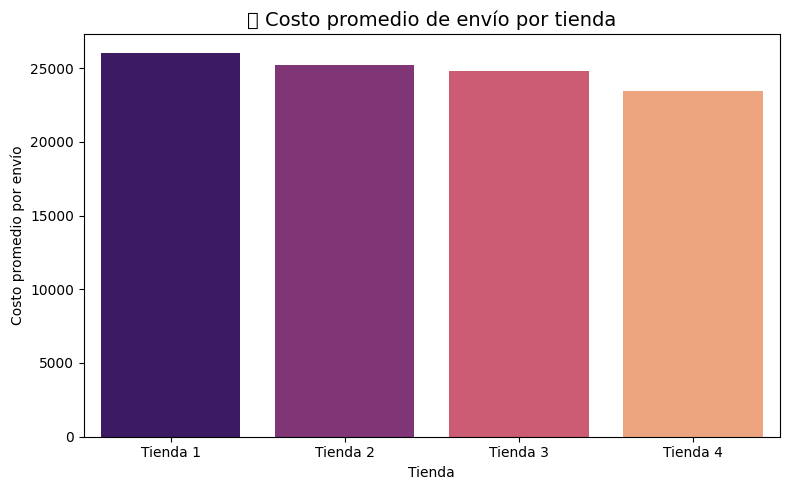

In [36]:
# 🔹 5.5 Costo promedio de envío por tienda

costo_envio_promedio = datos.groupby("tienda")["Costo de envío"].mean().reset_index()
costo_envio_promedio = costo_envio_promedio.sort_values(by="Costo de envío", ascending=False)

# Mostrar tabla
print("🚚 Costo promedio de envío por tienda:")
display(costo_envio_promedio)

# Visualización
plt.figure(figsize=(8,5))
sns.barplot(data=costo_envio_promedio, x="tienda", y="Costo de envío", palette="magma")
plt.title("🚚 Costo promedio de envío por tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Costo promedio por envío")
plt.tight_layout()
plt.show()



## 🔹 6. Visualizaciones

In [ ]:
# Gráficos de barras, pastel, dispersión, etc.
## 6. Visualizaciones

# Gráficos de barras, pastel, dispersión, etc.
## 6. Visualizaciones

A continuación se muestran las principales gráficas generadas durante el análisis:

# - 💰 Gráfico de facturación total por tienda
# - 📦 Gráfico de categorías más populares
# - ⭐ Gráfico de calificación promedio por tienda
# - 📈 Gráfico de productos más vendidos (Top 10)
# - 📉 Gráfico de productos menos vendidos (Bottom 10)
# - 🚚 Gráfico de costo promedio de envío por tienda
- 📈 Gráfico de productos más vendidos (Top 10)
- 📉 Gráfico de productos menos vendidos (Bottom 10)
- 🚚 Gráfico de costo promedio de envío por tienda

## 🔹 7. Recomendación final

**(Escribe aquí tu recomendación con base en los análisis anteriores.)**

## 7. Recomendación final

Después de analizar el rendimiento de las cuatro tiendas de Alura Store con base en los siguientes criterios:

- 💰 Facturación total
- 📦 Categorías más populares
- ⭐ Calificación promedio de los clientes
- 📈 Productos más y menos vendidos
- 🚚 Costo promedio de envío

**Recomendamos considerar la venta de la Tienda 4.**

### 📌 Justificación:
- Es la **tienda con menor facturación total**.
- Tiene un **rendimiento menor** en comparación con las demás tiendas, tanto en ingresos como en productos más vendidos.
- Aunque presenta un **costo promedio de envío más bajo**, este aspecto no compensa la baja facturación ni el menor volumen general de ventas.

Tienda 1, a pesar de tener el costo de envío más alto, genera los **mayores ingresos** y concentra muchos de los **productos más vendidos**.  
Tienda 2 y Tienda 3 presentan resultados intermedios pero sólidos.

Por lo tanto, **Tienda 4 muestra menor desempeño global**, y sería una opción estratégica para desinversión y así redirigir recursos al nuevo proyecto de Juan.


## 🔹 8. Conclusión

Resumen del trabajo, herramientas usadas y aprendizajes.

## 8. Conclusión

Durante este análisis se aplicaron herramientas esenciales de ciencia de datos para ayudar al Sr. Juan a tomar una decisión informada sobre qué tienda vender.

### 🧰 Herramientas utilizadas:
- **Python** como lenguaje principal.
- **Google Colab** para ejecutar el notebook en la nube.
- **Pandas** para cargar, explorar y manipular los datos.
- **Matplotlib** y **Seaborn** para visualizar información clave y detectar patrones.

### 📊 ¿Qué hicimos?
- Cargamos y combinamos datos de ventas de 4 tiendas.
- Exploramos y limpiamos los datos para garantizar su fiabilidad.
- Analizamos 5 aspectos clave del rendimiento de las tiendas.
- Generamos visualizaciones para respaldar los hallazgos.
- Emitimos una recomendación final basada en datos objetivos.

### 💡 Aprendizajes:
- Aprendimos a usar agrupamientos y visualizaciones para obtener insights.
- Vimos cómo una tienda puede parecer buena en un área (por ejemplo, envío barato), pero aún así no ser la mejor opción global.
- Comprobamos cómo los datos bien analizados ayudan a tomar **decisiones estratégicas**.

---

Este proyecto representa un ejemplo realista de cómo el análisis de datos puede guiar decisiones empresariales importantes. 🎯

